# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Ryan Krabbe

### Github Repository: https://github.com/ryankrabbe/krabbe-07-article-summarizer.git

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [110]:
from collections import Counter
import pickle
import requests
from bs4 import BeautifulSoup
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib as plt
import spacy
import json
import html5lib
import nltk

!pip list

Package            Version
------------------ ------------
annotated-types    0.7.0
asttokens          3.0.0
beautifulsoup4     4.12.3
blis               1.0.1
bs4                0.0.2
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.9
decorator          5.1.1
en_core_web_sm     3.8.0
executing          2.1.0
fonttools          4.55.0
html5lib           1.1
idna               3.10
ipykernel          6.29.5
ipython            8.30.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.3
matplo

### Question 1

Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [111]:
# Designate URL as variable
url = "https://www.aol.com/3-men-run-every-chicago-100000272.html"

# Send GET request to fetch HTML
response = requests.get(url)

# Use if and else to test request results
if response.status_code == 200:
    article_html = response.text
else:
    raise Exception(f"Failed to fetch the URL. Status code: {response.status_code}")

# .pkl Path
file_path = "chicago_marathon.pkl"

# Save file as .pkl
with open(file_path, "wb") as file:
    pickle.dump(article_html, file)

print(f"Article HTML saved to {file_path}")

Article HTML saved to chicago_marathon.pkl


### Question 2

Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [144]:
# Load HTML article from .pkl file
with open("chicago_marathon.pkl", "rb") as file:
    html_article = pickle.load(file)

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html_article, "html.parser")

# Making sure soup ONLY finds the article
article = soup.find('article')

# Print and Extract contents of the article
Text = article.get_text()
print(Text)

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add spacytextblob to the pipeline
nlp.add_pipe("spacytextblob")

# Performing sentiment analysis on the article text
doc = nlp(Text)
polarity_score = doc._.blob.polarity
print(f"\nPolarity score: {polarity_score}")
print(f"\nThe article's polarity score of 0.1252171560323734 indicates that this article is more positive than negative, but leans on the neutral side.")

# Count number of Sentences from Article
number_sentences = len(list(doc.sents))
print(f"\nThe Number of sentences in the article is: {number_sentences}")

3 men have run every Chicago Marathon since 1977. Now in their 70s, they won’t break the streak.Karina Atkins, Chicago TribuneUpdated October 7, 2024 at 4:17 AM Stacey Wescott/Chicago Tribune/TNSRandy Burt ate pepperoni pizza and drank red wine for dinner on Sept. 24, 1977. The next morning, he put on his old high school gym uniform and went to the starting line of the first Chicago Marathon.“I made it past 10 miles feeling pretty good about myself, and then, by around mile 21, that pepperoni pizza started to say hello to me,” recalled Burt, now 76. “I got stomach cramps and saw the top of my shoes because I was bent over.”It may have been a rookie mistake, but he was hooked. Now 45 Chicago Marathons later, Burt is training for his 46th race.The Antioch resident will join more than 50,000 runners expected to make the 26.2-mile trek through the city on Sunday for the city’s 46th marathon, now called the Bank of America Chicago Marathon. (There was no race during the COVID-19 pandemic in

### Question 3

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [145]:
# Import Packages
import spacy
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(Text)

# Filter out tokens that are not needed
tokens = [token.text for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count frequencies of tokens
token_counts = Counter(tokens)

# Determine 5 most frequent tokens
most_frequent_tokens = token_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Tokens:")
for token, freq in most_frequent_tokens:
    print(f"Token: {token}, Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: Chicago, Frequency: 13
Token: race, Frequency: 11
Token: Burt, Frequency: 8
Token: Marathon, Frequency: 7
Token: marathon, Frequency: 7


### Question 4

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [146]:
# Filter out lemmas that are not needed
lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count frequencies of lemmas
lemma_counts = Counter(lemmas)

# Determine 5 most frequent lemmas
most_frequent_lemmas = lemma_counts.most_common(5)

# Print results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_frequent_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: Chicago, Frequency: 13
Lemma: race, Frequency: 11
Lemma: run, Frequency: 9
Lemma: Burt, Frequency: 8
Lemma: Marathon, Frequency: 7


### Question 5

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

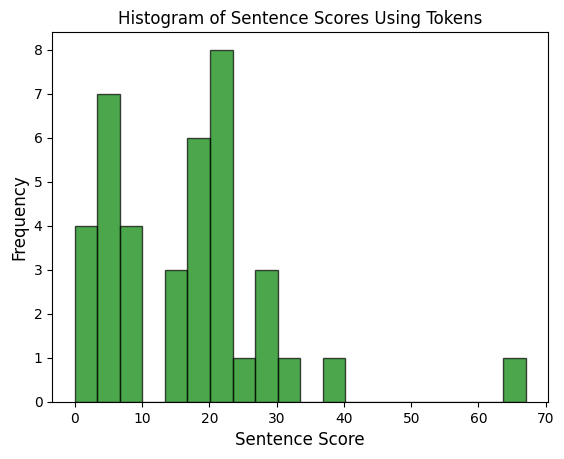

In [147]:
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(Text)

# Tokenize
tokens = [token.text for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Counting token frequencies
tokenCounts = Counter(tokens)

# Score sentences and make list
tokenScore = [
    sum(tokenCounts[token.text.lower()] for token in sentence if token.text.lower() in tokenCounts)
    for sentence in doc.sents
]

# Plot histogram
plt.hist(tokenScore, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentence Scores Using Tokens')
plt.xlabel('Sentence Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# The most common range of scores are 5 and 20

### Question 6

Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

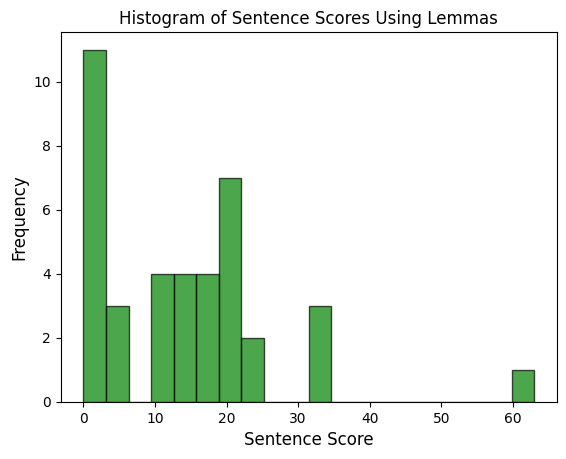

In [ ]:
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(Text)

# Tokenize
lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Counting lemma frequencies
lemmaCounts = Counter(lemmas)

# Score sentences and make list
lemmaScore = [
    sum(lemmaCounts[lemma.text.lower()] for lemma in sentence if lemma.text.lower() in lemmaCounts)
    for sentence in doc.sents
]

# Plot histogram
plt.hist(lemmaScore, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentence Scores Using Lemmas')
plt.xlabel('Sentence Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# The most common range of scores are 0 to 2

### Question 7

Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 20
* Cutoff Score (lemmas): 10

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

### Question 8

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [236]:
# Creating the summary
summary_token_sentences = [
    sent.text.strip() for sent, score in zip(doc.sents, tokenScore) if score > 20
]

# Join the summary sentences to form the summary text
summary_text = ' '.join(summary_token_sentences)

# Print the summary
print("Summary of the Article based on Tokens:")
print(summary_text)

Summary of the Article based on Tokens:
The next morning, he put on his old high school gym uniform and went to the starting line of the first Chicago Marathon. “I made it past 10 miles feeling pretty good about myself, and then, by around mile 21, that pepperoni pizza started to say hello to me,” recalled Burt, now 76. The Antioch resident will join more than 50,000 runners expected to make the 26.2-mile trek through the city on Sunday for the city’s 46th marathon, now called the Bank of America Chicago Marathon. Burt is among just two other runners in this year’s race who can say they’ve run every Chicago Marathon since it began. George Mueller, 76, of the Streeterville neighborhood, and Henry Kozlowski, 74, of Wilmette, also were among the 4,200 runners in the city’s inaugural race through Chicago streets in 1977.“George Mueller, Randy Burt and Henry Kozlowski are a shining example of the spirit of the marathon, as they have run every Chicago Marathon since its inception,” said the 

### Question 9

Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add spacytextblob to the pipeline
nlp.add_pipe("spacytextblob")

# Process the text and get polarity score
doc = nlp(summary_text)
polarity_score = doc._.blob.polarity
print(f"\nPolarity Score Summary: {polarity_score}")

# Print the number of sentences in the summarized article
summary_doc = nlp(summary_text)
sentence_count = len(list(summary_doc.sents))
print("The Number of Sentences in Summarized Article:", sentence_count)



Polarity Score Summary: 0.14195815295815295
The Number of Sentences in Summarized Article: 15


### Question 10

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [241]:
# Creating the summary
summary_lemma_sentences = [
    sent.text.strip() for sent, score in zip(doc.sents, lemmaScore) if score > 10
]

# Join the summary sentences to form the summary text
summary_text_lemma = ' '.join(summary_lemma_sentences)

# Print the summary
print("Summary of the Article Based on Lemmas:")
print(summary_text_lemma)

Summary of the Article Based on Lemmas:
The next morning, he put on his old high school gym uniform and went to the starting line of the first Chicago Marathon. The Antioch resident will join more than 50,000 runners expected to make the 26.2-mile trek through the city on Sunday for the city’s 46th marathon, now called the Bank of America Chicago Marathon. Burt is among just two other runners in this year’s race who can say they’ve run every Chicago Marathon since it began. George Mueller, 76, of the Streeterville neighborhood, and Henry Kozlowski, 74, of Wilmette, also were among the 4,200 runners in the city’s inaugural race through Chicago streets in 1977.“George Mueller, Randy Burt and Henry Kozlowski are a shining example of the spirit of the marathon, as they have run every Chicago Marathon since its inception,” said the race’s executive director, Carey Pinkowski, in a statement to the Tribune. “Some ran bent forward, their heads pushing toward the finish line that lay two dozen 

### Question 11

Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add spacytextblob to the pipeline
nlp.add_pipe("spacytextblob")

# Process the text and get polarity score
doc = nlp(summary_text_lemma)
polarity_score = doc._.blob.polarity
print(f"\nPolarity Score Summary: {polarity_score}")

# Print the number of sentences in the summarized article
summary_doc = nlp(summary_text_lemma)
sentence_count = len(list(summary_doc.sents))
print("The Number of Sentences in Summarized Article:", sentence_count)


Polarity Score Summary: 0.1322642574816488
The Number of Sentences in Summarized Article: 12


### Question 12

Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

### **Polarity Scores**

* Article Polarity Score: 0.1252171560323734
* Token Summary Polarity Score: 0.14195815295815295
* Lemma Summary Polarity Score: 0.1322642574816488

### **Conclusion**

* All three scores are close, so the sentiment between the full article and both summaries are similar. Although, all three scores were in the positive range the full article polarity score was the lowest of the three. I believe this is due to none of the words in the full article being taken out or reduced. In the summarized article some of the filler content is taken out and the articles only focus on the "impactful" words or sentences, which is why the polarity score is a bit higher than the full article.

### Question 13

Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

### **Conclusion**
In my opinion, the summarized token article is the bet of the three. The article is on the more emotional side telling the story of the few runners who have ran the Chicago Marathon every year since it's inception. The summarized token article does the best job of the three picking up on the emotional pieces of the article and detailing how impressive it is for men of their age to run every Chicago marathon since it's inception in 1977.